In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings as wn

In [2]:
# reading telco customer churn csv file:
df= pd.read_csv('OneDrive/Desktop/Python_practice_files/Customer_Churn_EDA-p3.csv')
print(f"Loaded Dataset: {df.shape[0]} rows, {df.shape[1]} columns")

Loaded Dataset: 7043 rows, 21 columns


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# replacing blanks with 0 as tenure is 0 and no total charges are recorded:
df['TotalCharges']= df['TotalCharges'].replace(" ","0")

# converting object dtype into float:
df['TotalCharges']= df['TotalCharges'].astype(float)

In [6]:
# checking whether data is null:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# basic data description:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
# checking duplicate values based on unique value of data:
df['customerID'].duplicated().sum()

0

In [25]:
# replacing senior citizen values with yes and no by defining the funcition:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)

[Text(0, 0, '5174'), Text(0, 0, '1869')]

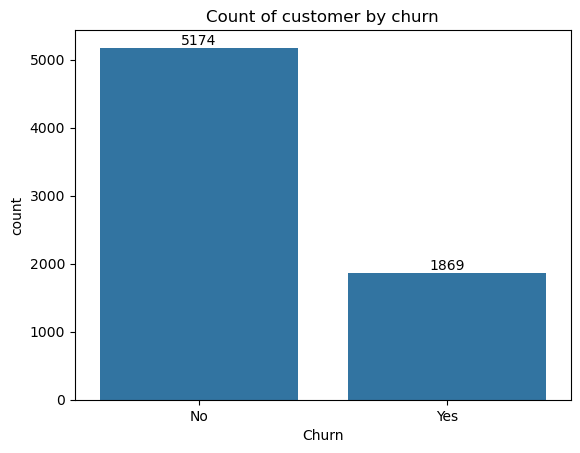

In [14]:
# calculationg how much customers are churned out using bar chart: 
ax = sns.countplot(x = 'Churn', data=df)
plt.title("Count of customer by churn")
ax.bar_label(ax.containers[0])

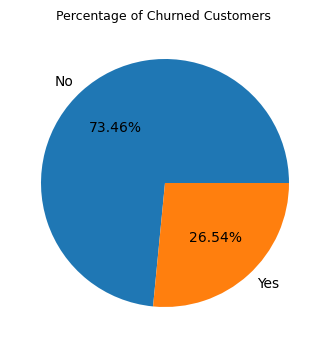

In [18]:
# calculating the % of customers who churned out using pie plot: 
plt.figure(figsize=(4,8))
gb_churn = df.groupby("Churn").agg({"Churn":"count"})
plt.title("Percentage of Churned Customers ", fontsize = 9)
plt.pie(gb_churn["Churn"], labels=gb_churn.index, autopct= "%1.2f%%")
plt.show()

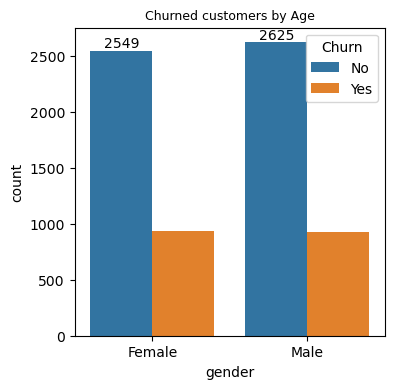

In [29]:
# Number of churned customers by age:
plt.figure(figsize = (4,4))
gender = sns.countplot(x = 'gender', data= df,  hue= "Churn")
gender.bar_label(gender.containers[0])
plt.title("Churned customers by Age", fontsize= 9)
plt.show()

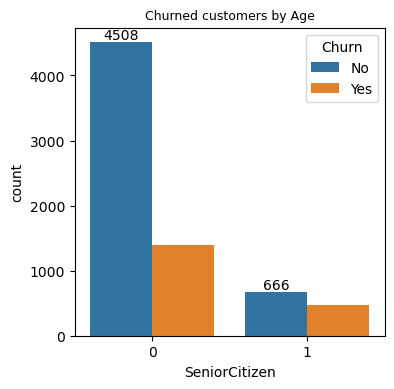

In [30]:
plt.figure(figsize = (4,4))
sen_citizen = sns.countplot(x = 'SeniorCitizen', data= df,  hue= "Churn")
sen_citizen.bar_label(sen_citizen.containers[0])
plt.title("Churned customers by Age", fontsize= 9)
plt.show()

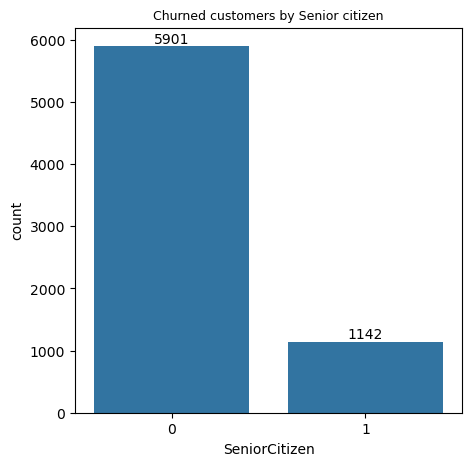

In [31]:
# Number of churned customers by Senior citizen:
plt.figure(figsize = (5,5))
snr = sns.countplot(x = 'SeniorCitizen', data= df)
snr.bar_label(snr.containers[0])
plt.title("Churned customers by Senior citizen", fontsize= 9)
plt.show()

<Figure size 500x500 with 0 Axes>

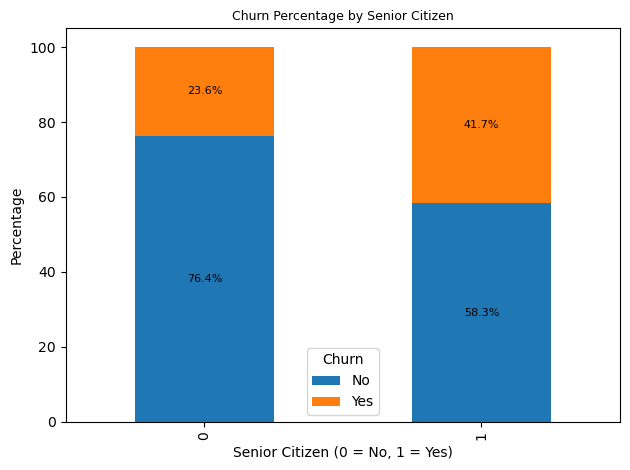

In [32]:
# churned customers by age:
churn_pct = pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index') * 100
plt.figure(figsize=(5,5))
ax = churn_pct.plot(kind='bar',stacked=True)
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f%%',label_type='center',fontsize=8)
    
ax.set_title('Churn Percentage by Senior Citizen', fontsize=9)
ax.set_xlabel('Senior Citizen (0 = No, 1 = Yes)')
ax.set_ylabel('Percentage')
ax.legend(title='Churn')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Customers churned by tenure')

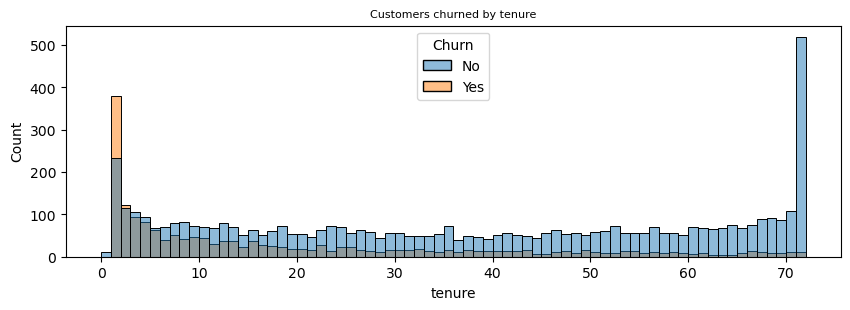

In [29]:
# customers by tenure:
plt.figure(figsize=(10,3))
sns.histplot(x= 'tenure', data=df, bins=72, hue="Churn")
plt.title("Customers churned by tenure", fontsize=8)

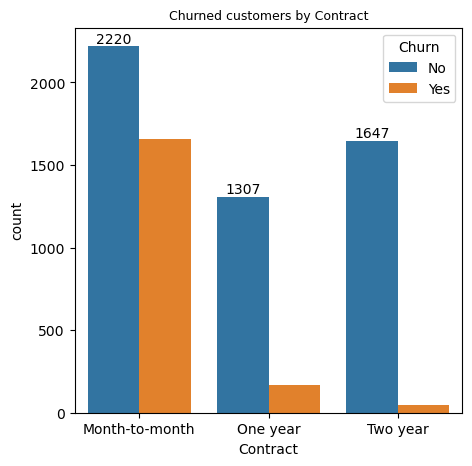

In [33]:
# Number of churned customers by contract:
plt.figure(figsize = (5,5))
cntrt = sns.countplot(x = 'Contract', data= df, hue="Churn")
cntrt.bar_label(cntrt.containers[0])
plt.title("Churned customers by Contract", fontsize= 9)
plt.show()

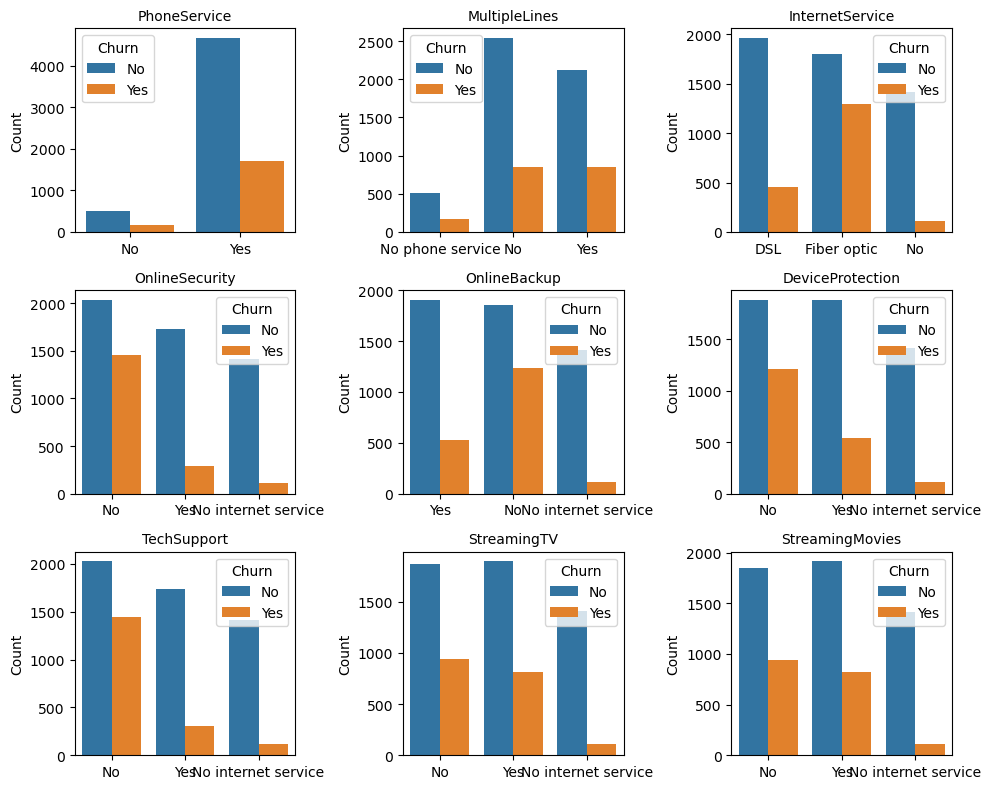

In [40]:
# Customer churned by List of service columns:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
plt.figure(figsize=(10, 8))
for i, col in enumerate(service_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, hue="Churn")
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

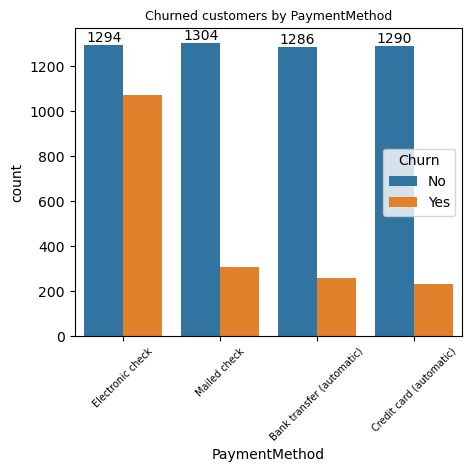

In [52]:
# Number of churned customers by PaymentMethod:
plt.figure(figsize = (5,4))
payment = sns.countplot(x = 'PaymentMethod', data= df, hue="Churn")
payment.bar_label(payment.containers[0])
plt.title("Churned customers by PaymentMethod", fontsize= 9)
plt.xticks(fontsize=7)
plt.xticks(rotation=45)
plt.show()

In [67]:
# Total charges by churn:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
total_charges = df.groupby('Churn')['TotalCharges'].sum().reset_index()
total_charges

,Churn,TotalCharges
0,No,13193241.8
1,Yes,2862926.9
